# 코드 예시) Random 함수 


In [1]:
import random

In [2]:
#random.random() -> 0.0에서 1.0사이의 실수 중에서 난수값 리턴
print(random.random()) 
# ex) 0.2664520652284096

#random.uniform(a, b) -> 괄호 안 두 수 사이의 실수 중에서 난수값을 리턴
print(random.uniform(10, 30)) 
# ex) 28.038707445386397

#random.randint(a, b) -> 괄호 안 두 수 사이의 정수 중에서 난수값을 리턴
print(random.randint(100,200))
# ex) 106

#random.choice(sample) 함수 -> sample에서 무작위로 하나를 선택하여 리턴
data = [1, 2, 3, 4, 5, 6, 7]
print(random.choice(data))
# ex) 5

#random.sample(sample, n) -> 입력으로 받은 sample 에서 정한 개수만큼  무작위로 뽑아 리턴함
data = [1, 2, 3, 4, 'apple', 'banna']
print(random.sample(data, 3))
# ex) ['apple', 2, 3]
print(random.sample(data, 3))
# ex) ['apple', 3, 'banna']
print(random.sample(data, 5))
# ex) [2, 3, 1, 'apple', 4]

0.5945475946601202
16.628659053548645
149
1
[3, 'apple', 1]
[3, 'banna', 4]
[3, 1, 'banna', 2, 'apple']


# 실습1. 난수 히스토그램 그리기 (Python Random module)


In [112]:
# import packages
import matplotlib.pyplot as plt
from tqdm import tqdm # optional
import random

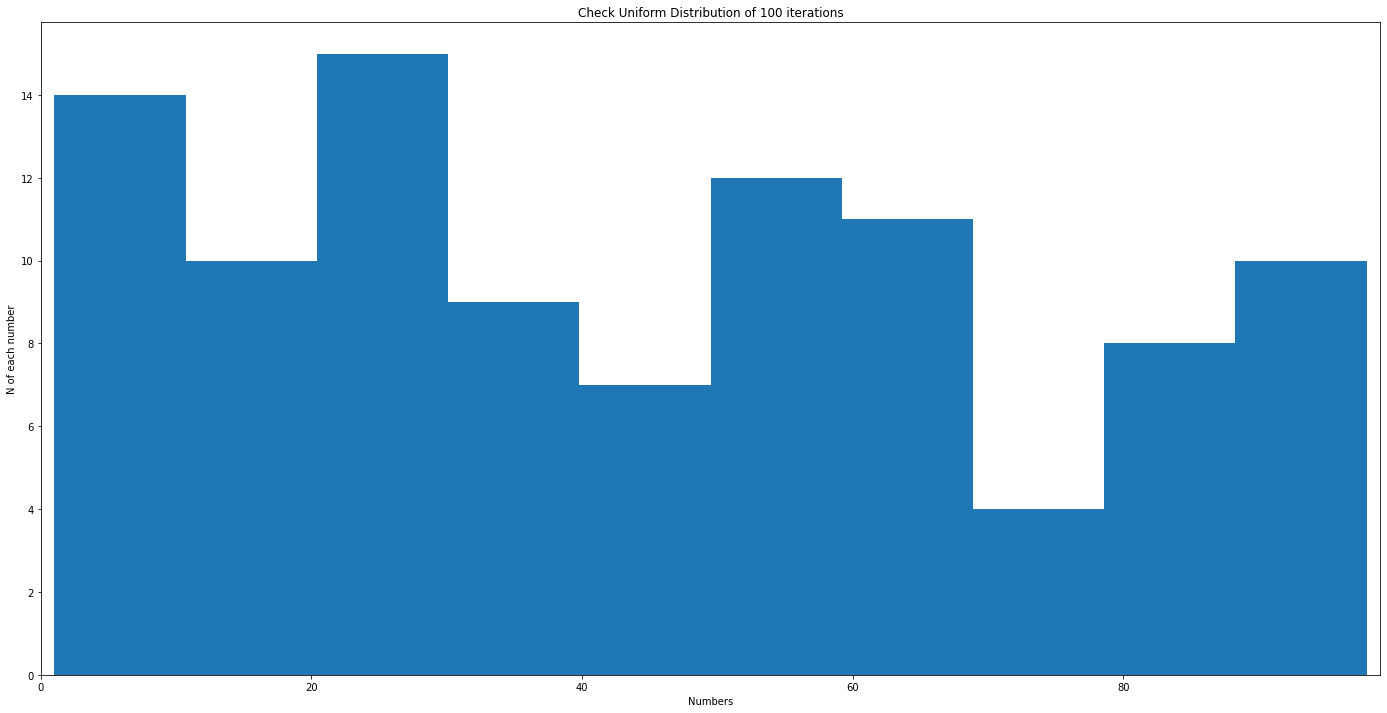

In [118]:
# 100번 수행
num_iterations = 100
random_integers = []

## write answer
for i in range(num_iterations):
  random_integers.append(random.randint(0,99))


fig = plt.figure()
plt.hist(random_integers)
plt.title(f"Check Uniform Distribution of {num_iterations} iterations")
plt.xlabel("Numbers")
plt.ylabel("N of each number")
plt.xlim([0, 99])
plt.show()

# 실습 2. Linear Congruential Generator(LCG) 구현  

Linear Congruential Generator(LCG) 구현  

X_(n+1) = (aX_n+C) mod m

LCG는 다음과 같은 인자들로 유일하게 결정됨  
  - 0 < m, 0 < a < m, 0 <= c < m, 0<=초기값 < m  

최대 주기 m을 가지기 위한 필요충분조건  

  - c와 m이 서로소, a-1이 m의 모든 소인수로 나뉨 
  - m이 4의 배수면 a-1도 4의 배수

In [114]:
def lcg(seed, loop, m=2**32, a=214013, c=2531011):
    for i in range(loop):
        seed=(a*seed+c)%m
        yield seed

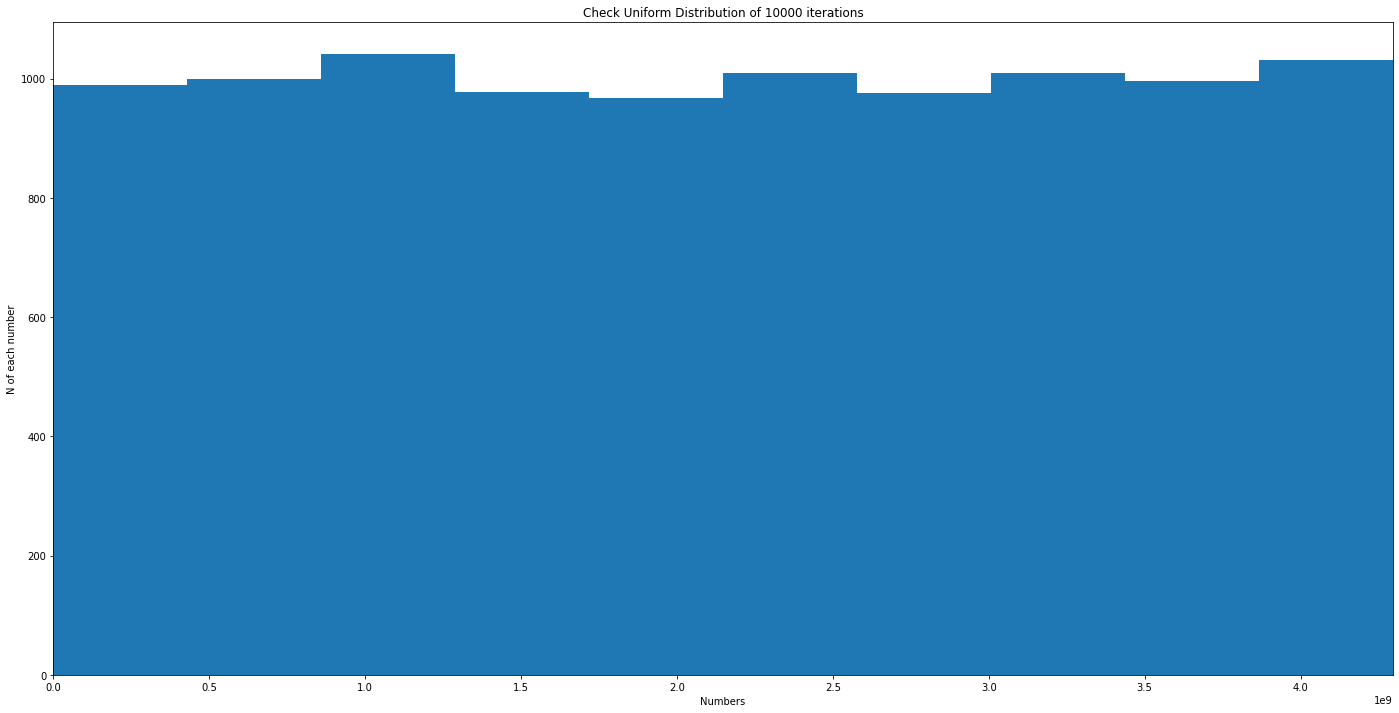

In [116]:
num_iterations = 10000
random_generator = lcg(seed=13, loop=num_iterations, m=2**32)
random_integers = []

## write answer
for i in random_generator:
  random_integers.append(i)

fig = plt.figure()
plt.hist(random_integers)
plt.title(f"Check Uniform Distribution of {num_iterations} iterations")
plt.xlabel("Numbers")
plt.ylabel("N of each number")
plt.xlim([0, 2**32])
plt.show()

# 실습 3. 주사위 합이 8인 경우

In [13]:
# 출력시 컬러 지원 가능 모듈 설치
!pip install termcolor
from termcolor import colored
!pip install colorama
from colorama import init, Fore, Back, Style


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
def roll_dice():
    ## write answer
    return (random.randint(1,6),random.randint(1,6))

In [61]:
dice_tries = []
num_iterations = 100
hits = 0
for _ in range(num_iterations):
    dice_tries.append(roll_dice())
print("="*100)
print(colored("* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *", 'red'))
for i in range(num_iterations):
  if i>0 and i%5==0:
    print()
  if dice_tries[i][0]+dice_tries[i][1]==8:
    hits+=1
    print('\033[46m' + 'try %2d : %d %d'%(i,dice_tries[i][0], dice_tries[i][1]), '\033[0m' , end='')
  else:
    print('try %2d : %d %d '%(i,dice_tries[i][0],dice_tries[i][1]),end='')
print(colored("\n실제 값 : 0.138889", "red"))
print(colored(f"계산된 값 : {round(hits / num_iterations,6)}", "red"))
print(colored(f"오차율 : {abs(hits / num_iterations - 5/36) / (5/36) * 100} %", "red"))
print("="*100)


* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *
try  0 : 3 2 try  1 : 1 3 try  2 : 1 2 try  3 : 2 2 try  4 : 3 1 
try  5 : 3 3 try  6 : 4 1 try  7 : 3 3 try  8 : 1 1 try  9 : 1 5 
try 10 : 6 3 try 11 : 2 5 try 12 : 6 6 try 13 : 1 6 try 14 : 5 5 
try 15 : 4 2 try 16 : 6 4 try 17 : 2 1 try 18 : 2 4 try 19 : 5 6 
try 20 : 1 2 try 21 : 6 4 try 22 : 5 3 try 23 : 2 1 try 24 : 5 4 
try 25 : 4 3 try 26 : 3 3 try 27 : 6 5 try 28 : 4 1 try 29 : 3 5 
try 30 : 2 6 try 31 : 1 1 try 32 : 2 3 try 33 : 4 2 try 34 : 6 1 
try 35 : 3 1 try 36 : 1 6 try 37 : 3 2 try 38 : 6 1 try 39 : 3 3 
try 40 : 5 4 try 41 : 4 2 try 42 : 5 2 try 43 : 5 2 try 44 : 2 3 
try 45 : 1 6 try 46 : 2 5 try 47 : 4 5 try 48 : 5 3 try 49 : 2 5 
try 50 : 3 2 try 51 : 2 2 try 52 : 4 2 try 53 : 6 1 try 54 : 4 3 
try 55 : 5 6 try 56 : 6 6 try 57 : 4 3 try 58 : 5 2 try 59 : 6 2 
try 60 : 1 6 try 61 : 1 2 try 62 : 2 4 try 63 : 6 1 try 64 : 6 1 
try 65 : 4 1 try 66 : 6 6 try 67 : 2 2 try 68 : 4 6 try 69 : 2 6 
try 70 : 4 4 try 71 : 3 4 try 72 : 

# 실습 4. 주사위 게임

In [62]:
def roll_dice():
    ## write answer
    return random.randint(1,6)

In [65]:
# Inputs
num_simulations = 10000
max_num_rolls = 1000
bet = 1


win_probability = []
end_balance = []

(0.0, 1000.0)

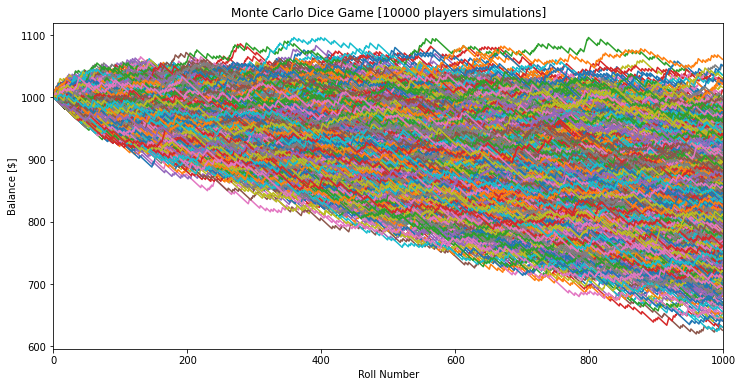

In [76]:
plt.figure(figsize=(12,6))
for i in range(num_simulations):
    ## write answer
    wincnt=0
    money=[1000]
    for j in range(max_num_rolls-1):
      a=roll_dice()
      b=roll_dice()
      if a==b:
        wincnt+=1
        money.append(money[-1]+4)
      else:
        money.append(money[-1]-1)
    win_probability.append(wincnt/1000.0)
    end_balance.append(money[-1])
    plt.plot(range(1000),money)
plt.title("Monte Carlo Dice Game [" + str(num_simulations) + " players simulations]")
plt.xlabel("Roll Number")
plt.ylabel("Balance [$]")
plt.xlim([0, max_num_rolls])

In [79]:
winrate=0.0
sumbalance=0.0
for i in range(num_simulations):
  winrate+=win_probability[i]
  sumbalance+=end_balance[i]
overall_win_probability = winrate/num_simulations
overall_end_balance = sumbalance/num_simulations

print(f"10000명 플레이어의 {max_num_rolls}번 수행 횟수 시 평균 승률" + "  :  " + colored(f"{overall_win_probability:.2f}","red"))
print(f"10000명 플레이어의 {max_num_rolls}번 수행 횟수 시 평균 잔액 "  + f" : {colored('$','red')}" + colored(f"{overall_end_balance:.2f}","red"))

10000명 플레이어의 1000번 수행 횟수 시 평균 승률  :  0.17
10000명 플레이어의 1000번 수행 횟수 시 평균 잔액  : $833.43


# 실습 5. 원주율 구하기

# 초기 세팅

(-2.0, 2.0)

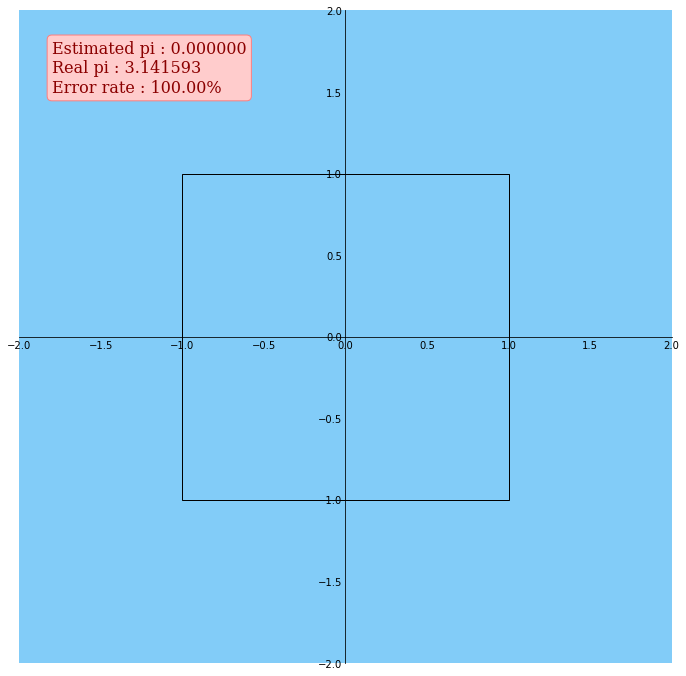

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

pi = 0

plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.5, f"Estimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# pi 추측

(-2.0, 2.0)

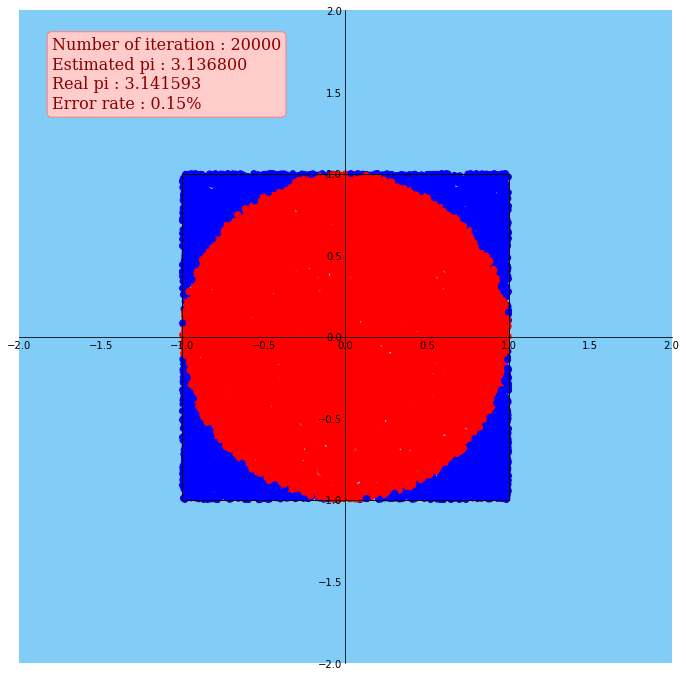

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

MAX_POINTS = 20000
x_coords = []
y_coords = []
in_markers = []


## write answer
hits=0.0
for i in range(MAX_POINTS):
  x_coords.append(random.uniform(-1,1))
  y_coords.append(random.uniform(-1,1))
  if x_coords[-1]*x_coords[-1]+y_coords[-1]*y_coords[-1]<=1:
    hits+=1
    in_markers.append('red')
  else:
    in_markers.append('blue')
pi=(hits/MAX_POINTS)*4


plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
# write code
ax.scatter(x_coords,y_coords,c=in_markers)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.4, f"Number of iteration : {MAX_POINTS}\nEstimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# 정확도를 0.1% 미만으로 만들어 보기 

(-2.0, 2.0)

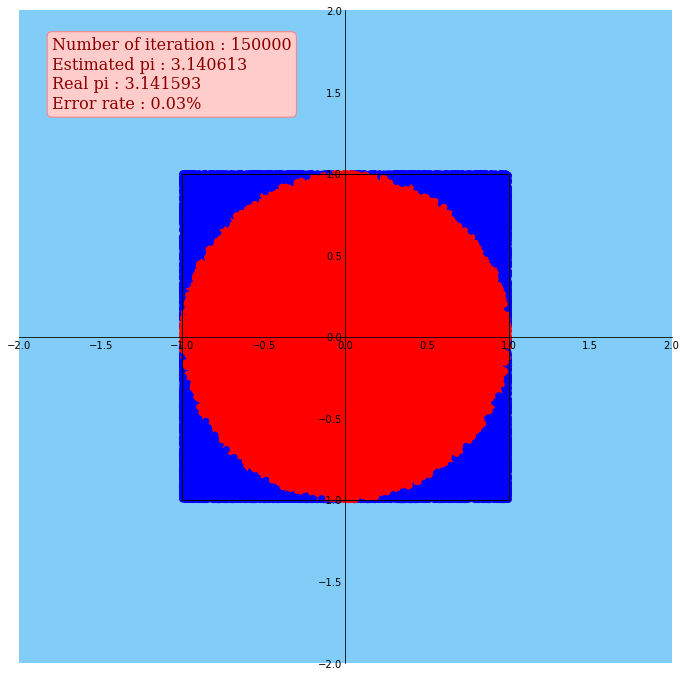

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

MAX_POINTS = 150000
x_coords = []
y_coords = []
in_markers = []


## write answer
hits=0.0
for i in range(MAX_POINTS):
  x_coords.append(random.uniform(-1,1))
  y_coords.append(random.uniform(-1,1))
  if x_coords[-1]*x_coords[-1]+y_coords[-1]*y_coords[-1]<=1:
    hits+=1
    in_markers.append('red')
  else:
    in_markers.append('blue')
pi=(hits/MAX_POINTS)*4


plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)
# write code
ax.scatter(x_coords,y_coords,c=in_markers)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.4, f"Number of iteration : {MAX_POINTS}\nEstimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])

# 실습 6. 계약 손익 예측

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 시뮬레이션 횟수
N_ROUNDS = 10000
results = []
for rnd in range(N_ROUNDS):
    ## write answer
    basic=random.triangular(1,9,3)
    up=random.triangular(0.25,0.75,0.5)
    sales = basic/2+basic*(1+up)/2
    results.append(sales)

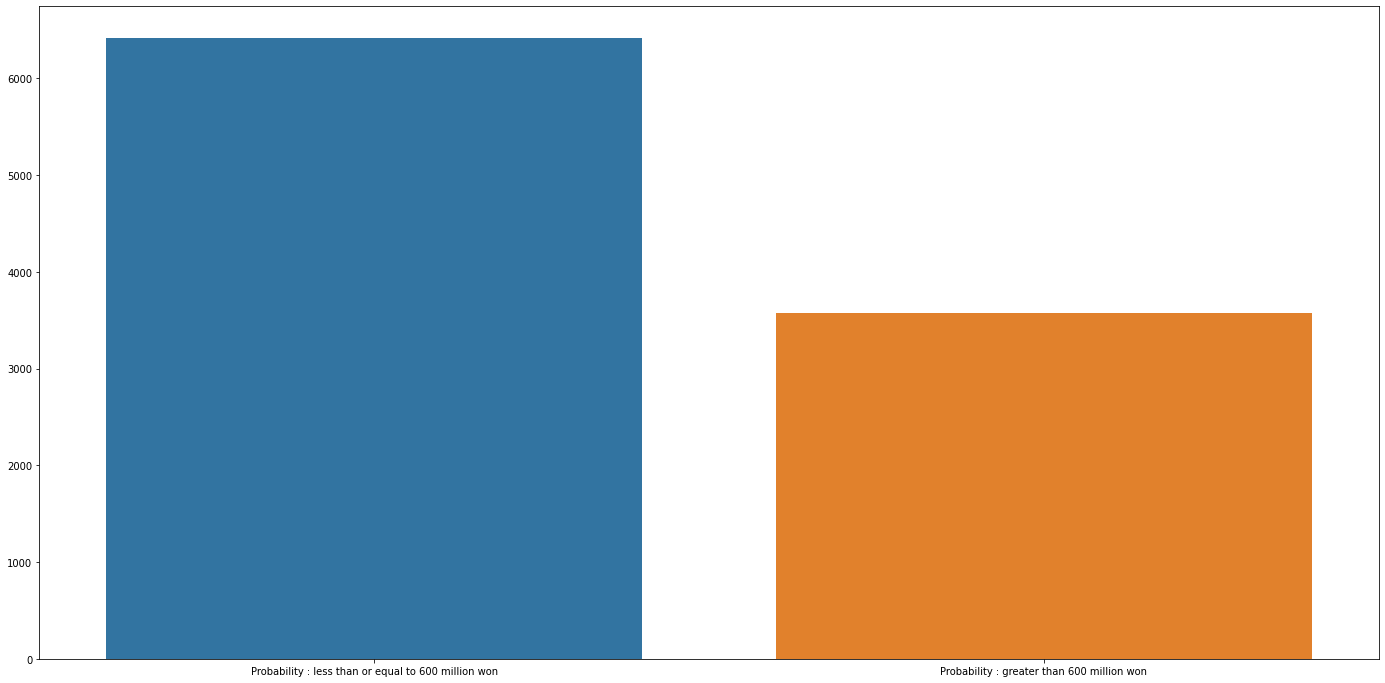

In [93]:
# 모든 시나리오에서 나온 신작 판매량의 평균 
average_sales = np.mean(results)

binned_results = pd.cut(results, bins=[0, 6, 20], labels=[
    "Probability : less than or equal to 600 million won",
    "Probability : greater than 600 million won"])

# 결과물 시각화
sns.barplot(x=binned_results.value_counts().index,
            y=binned_results.value_counts().values)
## write answer


In [94]:
C1 , C2 = binned_results.value_counts()
P1 = round(C1*100/N_ROUNDS,2)
P2 = round(C2*100/N_ROUNDS,2)

print("6억원 이하의 매출을 얻을 확률 :", colored(f"{P1}","red") )
print("6억원 초과의 매출을 얻을 확률 :", colored(f"{P2}","blue"))

6억원 이하의 매출을 얻을 확률 : 64.23
6억원 초과의 매출을 얻을 확률 : 35.77


# 실습 7 헬스장 수익 예측


In [102]:
import numpy as np
import seaborn as sns
from termcolor import colored

In [226]:
np.random.seed(1)
subscription_data = {"Month": range(1, 60), 
                     "Growth": np.random.normal(0, 0.05, 60)}

N_ROUNDS = 10000
results = []
historical_data = subscription_data["Growth"]
for rnd in range(N_ROUNDS):
  people=2000.0
  money=0.0
  for i in range(12):
    people *= (1 + historical_data[random.randint(0,59)])
    money+=people*50000.0
  results.append(money)


# 99%의 신뢰도  
- 10000개의 수행 결과를 낮은 수익부터 순서대로 정렬하고 100번째(100/10000)번째의 수익을 확인

In [227]:

print("하위 1%의 수익 : ", colored(f"{sorted(results)[100] / 1e8:.4f} 억","red"))


## write answer
##
lower_revenue = sorted(results)[100]
print(f"매년 준비해야할 금액 : ",  colored(f"{(12*9.5*1e7 - lower_revenue)/1e8:.4f} 억","red"))

하위 1%의 수익 :  9.5274 억
매년 준비해야할 금액 :  1.8726 억


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


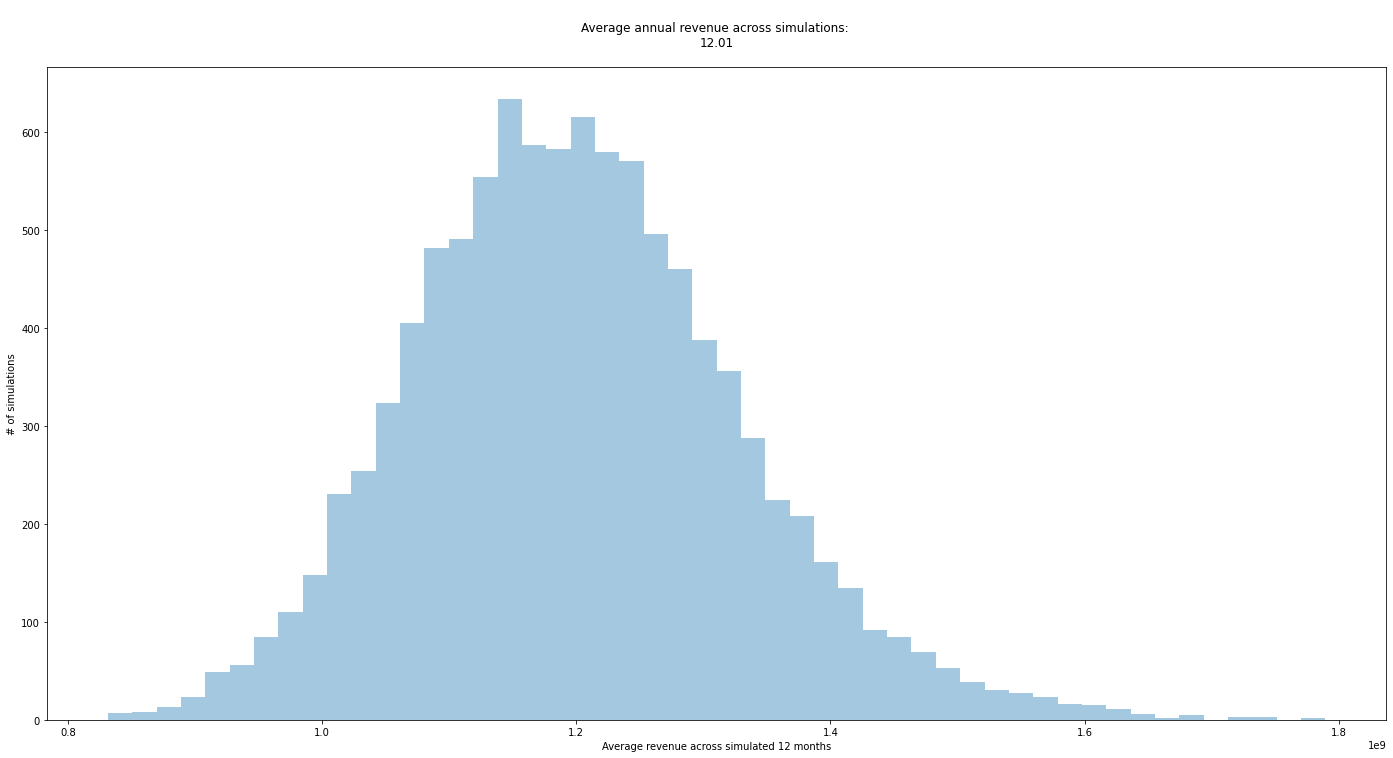

In [109]:
ax = sns.distplot(results, kde=False)
ax.set_xlabel("Average revenue across simulated 12 months")
ax.set_ylabel("# of simulations")
plt.title(f"""
Average annual revenue across simulations: 
{round(np.mean(results)/1e8, 2)}
""")
plt.show()